In [1]:
import chainer

In [ ]:
model = L.Classifier(MLP(1000,9))

In [ ]:
print(out_directory)
chainer.serializers.load_hdf5(filename="./Result2018_oono/20181218_131711/model.hdf",
                              obj=net)
model = L.Classifier(net)

In [ ]:
print("model.predictor.l1.W: ", model.predictor.l1.W)
print("model.predictor.l1.W.shape: ", model.predictor.l1.W.shape)
print("model.predictor.l1.W.data: ", model.predictor.l1.W.data, type(model.predictor.l1.W.data))


In [ ]:
from pylab import *
%matplotlib inline


In [ ]:
plot(model.predictor.l1.W.data[1])
show()

In [ ]:
wn = xls.as_matrix()[:, 0]
print(wn)


for i, v in enumerate(model.predictor.l1.W.data):
    if i == 0:
        _ = v
    else:
        _ = _ + v

matplotlib.pyplot.plot(wn, v/1000)
matplotlib.pyplot.xlim(4000, 700)

In [ ]:
s = xls.as_matrix()[:, 1]
s

for i, s in enumerate(model.predictor.l1.W.data):
    if i == 0:
        _ = s
    else:
        _ = _ + s

In [ ]:
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(8,6))
ax.plot(wn, v/1000, "k-")
bx = ax.twinx()

bx.plot(wa, s, "r-")
bx.plot(wo, o, "g-")
bx.plot(wc, c, "b-")

ax.set_xlim(4000, 700)

ax.set_xlabel(r"wavenumber [cm$^{-1}$]")
ax.set_ylabel("weight")
bx.set_ylabel("absorbance")

fig.savefig("./test0808_1.png")

In [ ]:
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(8,6))
ax.plot(wn, v/1000, "k-")
bx = ax.twinx()

bx.plot(wa, s, "r-")


ax.set_xlim(4000, 700)

ax.set_xlabel(r"wavenumber [cm$^{-1}$]")
ax.set_ylabel("weight")
bx.set_ylabel("absorbance")

fig.savefig("./test0807_2.png")

In [ ]:
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(8,6))
ax.plot(wn, v/1000, "k-")
bx = ax.twinx()


bx.plot(wo, o, "g-")


ax.set_xlim(4000, 700)

ax.set_xlabel(r"wavenumber [cm$^{-1}$]")
ax.set_ylabel("weight")
bx.set_ylabel("absorbance")

fig.savefig("./test0807_3.png")

In [ ]:
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(8,6))
ax.plot(wn, v/1000, "k-")
bx = ax.twinx()


bx.plot(wc, c, "b-")

ax.set_xlim(4000, 700)

ax.set_xlabel(r"wavenumber [cm$^{-1}$]")
ax.set_ylabel("weight")
bx.set_ylabel("absorbance")

fig.savefig("./test0807_4.png")

In [ ]:
fig, bx = matplotlib.pyplot.subplots(1,1,figsize=(8,6))


bx.plot(wa, s, "r-")
bx.plot(wo, o, "g-")
bx.plot(wc, c, "b-")

bx.set_xlim(4000, 700)

bx.set_xlabel(r"wavenumber [cm$^{-1}$]")

bx.set_ylabel("absorbance")

fig.savefig("./test0807_5.png")

# hdf ファイルの練習

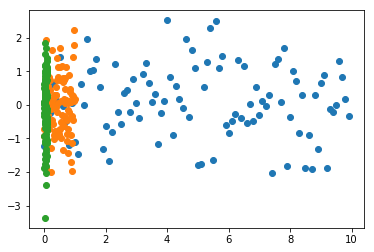

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sampling_frequency = [10.,100.,1000.]
t= np.zeros((3,100))
sample= np.zeros((3,100))
for i in np.arange(3):
    t[i] = np.arange(0,100.,1)/sampling_frequency[i]
    sample[i] = np.random.normal(size=len(t[i]))
    plt.plot(t[i],sample[i],'o')


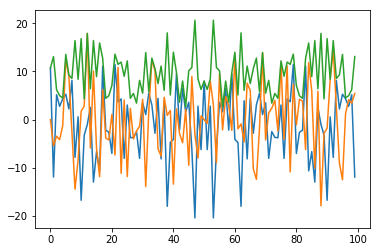

In [4]:
import numpy as np

for i in np.arange(3):
    if i ==0:
        sample_fft =[np.fft.fft(sample[i])]
    else:
        sample_fft =np.r_[sample_fft,[np.fft.fft(sample[i])]]
plt.plot(np.real(sample_fft[0]))
plt.plot(np.imag(sample_fft[0]))
plt.plot(np.abs(sample_fft[0]))




In [6]:
import h5py
output_file = "random.h5"
h5file = h5py.File(output_file,'w')
for i in np.arange(3):
    dir = 'frequency_'+str(np.int(sampling_frequency[i]))
    h5file.create_group(dir)
    h5file.create_dataset(dir+'/random_number',data= sample[i])
    h5file.create_dataset(dir+'/spectrum',data= sample_fft[i])
    h5file.flush()
    
h5file.flush()
h5file.close()

In [8]:
output_file

'random.h5'

In [9]:
h5file

<Closed HDF5 file>